<a href="https://colab.research.google.com/github/ATNam0508/AI_SPKT_Python/blob/main/rice_cooker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

39.99999999999999


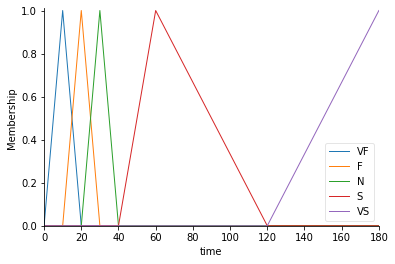

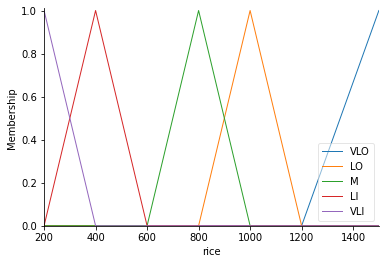

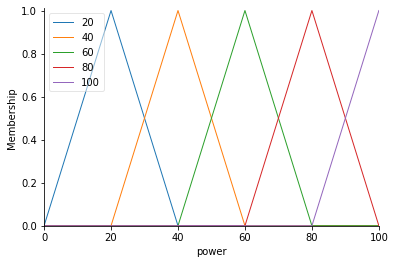

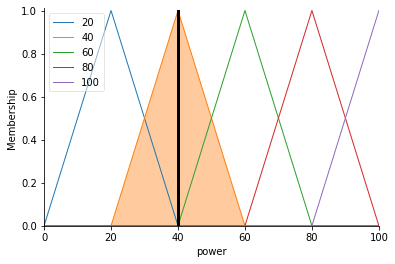

In [17]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

time = ctrl.Antecedent(np.arange(0, 181, 1), 'time')
rice = ctrl.Antecedent(np.arange(200, 1501, 1), 'rice')
power =  ctrl.Consequent(np.arange(0, 101, 1), 'power')

time['VF'] = fuzz.trimf(time.universe, [0, 10, 20])
time['F'] = fuzz.trimf(time.universe, [10, 20, 30])
time['N']  = fuzz.trimf(time.universe, [20, 30, 40])
time['S'] = fuzz.trimf(time.universe, [40, 60, 120])
time['VS']  = fuzz.trimf(time.universe, [120, 180, 180])

rice['VLO'] = fuzz.trimf(rice.universe, [1200, 1500, 1500])
rice['LO'] = fuzz.trimf(rice.universe, [800, 1000, 1200])
rice['M']  = fuzz.trimf(rice.universe, [600, 800, 1000])
rice['LI'] = fuzz.trimf(rice.universe, [200, 400, 600])
rice['VLI']  = fuzz.trimf(rice.universe, [0, 200, 400])

power['20'] = fuzz.trimf(power.universe, [0, 20, 40])
power['40'] = fuzz.trimf(power.universe, [20, 40, 60])
power['60']  = fuzz.trimf(power.universe, [40, 60, 80])
power['80'] = fuzz.trimf(power.universe, [60, 80, 100])
power['100']  = fuzz.trimf(power.universe, [80, 100, 100])

time.view()
rice.view()
power.view()

rule01 = ctrl.Rule(time['VF'] & rice['VLO'], power['100'])
rule02 = ctrl.Rule(time['F'] & rice['VLO'], power['80'])
rule03 = ctrl.Rule(time['N'] & rice['VLO'], power['60'])
rule04 = ctrl.Rule(time['S'] & rice['VLO'], power['40'])
rule05 = ctrl.Rule(time['VS'] & rice['VLO'], power['20'])

rule06 = ctrl.Rule(time['VF'] & rice['LO'], power['80'])
rule07 = ctrl.Rule(time['F'] & rice['LO'], power['80'])
rule08 = ctrl.Rule(time['N'] & rice['LO'], power['60'])
rule09 = ctrl.Rule(time['S'] & rice['LO'], power['40'])
rule10 = ctrl.Rule(time['VS'] & rice['LO'], power['20'])

rule11 = ctrl.Rule(time['VF'] & rice['M'], power['60'])
rule12 = ctrl.Rule(time['F'] & rice['M'], power['60'])
rule13 = ctrl.Rule(time['N'] & rice['M'], power['40'])
rule14 = ctrl.Rule(time['S'] & rice['M'], power['20'])
rule15 = ctrl.Rule(time['VS'] & rice['M'], power['20'])

rule16 = ctrl.Rule(time['VF'] & rice['LI'], power['40'])
rule17 = ctrl.Rule(time['F'] & rice['LI'], power['40'])
rule18 = ctrl.Rule(time['N'] & rice['LI'], power['40'])
rule19 = ctrl.Rule(time['S'] & rice['LI'], power['20'])
rule20 = ctrl.Rule(time['VS'] & rice['LI'], power['20'])

rule21 = ctrl.Rule(time['VF'] & rice['VLI'], power['20'])
rule22 = ctrl.Rule(time['F'] & rice['VLI'], power['20'])
rule23 = ctrl.Rule(time['N'] & rice['VLI'], power['20'])
rule24 = ctrl.Rule(time['S'] & rice['VLI'], power['20'])
rule25 = ctrl.Rule(time['VS'] & rice['VLI'], power['20'])


tipping_ctrl = ctrl.ControlSystem([rule01, rule02, rule03, rule04, rule05, rule06, rule07, rule08, rule09, rule10, rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
powping = ctrl.ControlSystemSimulation(tipping_ctrl)
powping.input['time'] = 60
powping.input['rice'] = 1500
powping.compute()

print(powping.output['power'])
power.view(sim = powping)


In [1]:
%pip install scipy
%pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=ad4fd0e4db0a0ee520cdc6b0bea58991072480e92a4e399165b1fafefd0b7953
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy
